In [1]:
%matplotlib inline
import sys, os, glob

from astropy.io import fits, ascii

import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import astropy.constants as const
from astropy.coordinates import SkyCoord, concatenate
from astropy import table

In [2]:
import scienceplots

plt.style.use(['bright', 'science', 'no-latex', 'notebook'])

In [354]:
hdul = fits.open('/data3/dr16q_prop_Oct20_2022.fits')
hdul[1].header
data_sdss = hdul[1].data
data_sdss = data_sdss[(data_sdss['SN_MEDIAN_ALL'] > 2) & (data_sdss['LOGMBH'] > 0) & (data_sdss['LOGMBH'] < 11)]

# From Qiaya: Now I am pretty confidence that you can remove all MBH>1e11 objs. After visually inspection, 
# I found that most of them are not quasar, a few have incorrect redshift, one or two underestimated the continuum.

In [356]:
data_dwarf_AGN

catalog,oridx,ra,dec,mass,mass_err,z,tau,dlogtau,sigma_lb,sigma_drw,SNR,baseline,cadence,var_snr,sigDerr
str15,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Liu+18,1,85.70309,0.67201,6.24,0.3,0.0518,0.14240709976619897,0.5169777262521235,1.5093311498018744,0.08307797342263538,1.5839104438784881,912.7270022999946,7.301816018399957,12.468215485198831,0.4363731783744645
Liu+18,2,115.93947,48.13709,5.48,0.3,0.0181,3.5878390845449055,0.26993343086010085,6.017565927827219,0.027355953046976043,1.391608374228139,1133.9705324000024,3.634520937179495,7.996265551898939,0.4349445786815317
Liu+18,3,122.02972,56.64234,6.14,0.3,0.099,43.44914069772265,0.3461289501776465,11.560467395720812,0.03151332477727061,0.6132240620032701,1141.0341203999997,3.9896297916083903,5.631226588082947,0.45585070674711053
Liu+18,4,122.13909,54.08923,6.05,0.3,0.2848,443.9081184957424,1.0365799577900296,15.33643605086827,0.14072475018008987,1.104935417678022,1114.9764004000026,6.026899461621635,5.828529841125325,0.5772336503415377
Liu+18,5,122.29468,11.10531,5.95,0.3,0.0526,8.116405473843702,0.17975196533330573,11.066820919666513,0.06746206808509234,1.801262169169648,1117.0140393999973,6.494267670930217,13.260570073022157,0.4388581948277674
Liu+18,6,124.32739,52.02992,6.3,0.3,0.0386,4.262139539706264,0.6434619089767143,3.4077997056949707,0.05996827090326308,1.5040957852926755,532.7776157000044,15.66992987352954,5.1687552458805985,0.44635237520774196
Liu+18,7,124.88909,23.28465,6.24,0.3,0.094,0.14531606641782735,0.5662064453909755,5.662611319630529,0.08064650181290611,1.1108735170452906,1141.9829976000037,3.5798840050156855,17.746546413199468,0.435209954614799
Liu+18,8,126.26247,11.17262,6.24,0.3,0.1077,0.3776244418006328,0.9571591313994567,0.14277878012864556,0.06902012447848256,1.202653308701907,1142.0284837999934,8.04245411126756,11.983048466093877,0.4326087729974886
Liu+18,9,126.72634,23.59384,6.2,0.3,0.1369,0.4889922362837645,1.7586602167076766,1.1621312274148758,0.03732545399644426,0.5714155471936075,1142.021157400006,13.12667997011501,5.16607119936804,0.4285672807030889


In [366]:
data_dwarf_AGN = ascii.read('franklin_broad_line_dwarf_agn.txt')
print(np.unique(data_dwarf_AGN['catalog']))

# I think Chilingarian should include the RGG sources
data_dwarf_AGN = data_dwarf_AGN[data_dwarf_AGN['catalog']!='RV15']

# Remove duplicates
cat_dwarf_AGN = SkyCoord(data_dwarf_AGN['ra'], data_dwarf_AGN['dec'], unit='deg')
idx,idx,d2d,d3d = cat_dwarf_AGN.search_around_sky(cat_dwarf_AGN, 1*u.arcsec)
#idx = np.unique(idx)
data_dwarf_AGN = data_dwarf_AGN[idx]

    catalog    
---------------
Chilingarian+18
           GH07
         Liu+18
           RV15


In [363]:
len(cat_dwarf_AGN)

673

In [364]:
len(np.unique(idx))

673

In [271]:
# Read BlackCAT (dynamical BH mass catalog)
# https://cdsarc.cds.unistra.fr/viz-bin/cat/J/A+A/587/A61#/browse
data_XRB = ascii.read('blackcat_4.txt', header_start=0, delimiter='|')
data_XRB

Name,e,Ctp,SpType,Porb,e_Porb,2,K2,e_K2,f(M1),(M1),M1,M1_1,_M1,e_ M1u,_q,q,E_q,e_ qu,_i,i,e_ iu,ni,tsini,sini,sini_1,Ref
str18,str1,str10,str7,float64,float64,str1,float64,float64,float64,float64,str2,float64,float64,str5,str2,str5,float64,float64,str2,float64,float64,str2,str5,float64,float64,str81
SWIFT J1357.2-0933,+,--,M2-4V,2.8,0.3,--,967.0,49.0,11.0,2.1,>,8.9,--,--,~,0.04,--,--,~,90.0,--,--,--,--,--,Corral-Santana2013;MataSanchez2015
XTE J1650-500,--,--,~K4V,7.69,0.02,--,435.0,30.0,2.7,0.6,<=,7.3,--,--,--,---,--,--,>,47.0,--,--,--,--,--,Orosz2004
XTE J1118+480,--,--,K7-M1V,4.078414,5e-06,--,709.0,1.0,6.27,0.04,--,6.9,--,- 8.2,--,0.024,0.009,0.009,--,68.0,-79.0,--,96.,3.0,11.0,Khargharia2013;Torres2004;GonzalezHernandez2008;Calvelo2009
XTE J1859+226,--,V406 Vul,~K5V,6.58,0.05,--,541.0,70.0,4.5,0.6,>,5.42,--,--,--,---,--,--,<,70.0,--,--,--,--,--,Corral-Santana2011
SAX J1819.3-2525,--,V4641 Sgr,B9III,67.6152,0.0002,--,211.0,3.0,2.7,0.1,--,6.4,0.6,0.6,--,0.63,--,-0.7,--,72.0,4.0,--,100.9,0.8,0.8,Orosz2001;MacDonald2014
XTE J1550-564,--,--,K2-K4IV,37.0088,0.0001,--,363.0,6.0,7.65,0.38,--,7.81,--,-15.6,~~,0.03,--,--,--,75.0,4.0,--,55.,5.0,5.0,Orosz2002;Orosz2011b
GRO J1655-40,--,N. Sco 94,F6IV,62.92,0.003,--,226.1,0.8,2.73,0.09,--,6.0,0.4,0.4,--,0.42,0.03,0.03,--,69.0,2.0,--,86.,3.3,3.6,Orosz1997;VanDerHooft1998;Shahbaz1999;Shahbaz2003;Beer2002;GonzalezHernandez2008a
GRS 1009-45,--,N. Vel 93,K7-M0V,6.8449,0.0003,--,475.0,6.0,3.2,0.1,>~,4.4,--,--,--,0.14,0.02,0.02,--,37.0,-80.0,--,---,--,--,Filippenko1999;Shahbaz1996
GRS 1915+105,--,V1487 Aql,K1-5III,812.0,4.0,--,126.0,1.0,7.0,0.2,--,10.1,0.6,0.6,--,0.042,0.024,0.024,--,66.0,2.0,--,21.,4.0,4.0,Harlaftis2004;Steeghs2013;Fender1999


In [5]:
# https://gwosc.org/eventapi/
data_GW = ascii.read('GWTC-3-confident.txt')
data_GW

id,commonName,version,catalog.shortName,GPS,reference,jsonurl,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper,network_matched_filter_snr,network_matched_filter_snr_lower,network_matched_filter_snr_upper,luminosity_distance,luminosity_distance_lower,luminosity_distance_upper,chi_eff,chi_eff_lower,chi_eff_upper,total_mass_source,total_mass_source_lower,total_mass_source_upper,chirp_mass_source,chirp_mass_source_lower,chirp_mass_source_upper,chirp_mass,chirp_mass_lower,chirp_mass_upper,redshift,redshift_lower,redshift_upper,far,far_lower,far_upper,p_astro,p_astro_lower,p_astro_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper
str18,str15,int64,str16,float64,str8,str67,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str4,str4,float64,float64,float64,float64,str4,str4,float64,str4,str4,float64,float64,float64
GW191103_012549-v1,GW191103_012549,1,GWTC-3-confident,1256779567.5,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confident/GW191103_012549/v1,11.8,-2.2,6.2,7.9,-2.4,1.7,8.9,-0.5,0.3,990.0,-470.0,500.0,0.21,-0.1,0.16,20.0,-1.8,3.7,8.34,-0.57,0.66,None,None,None,0.2,-0.09,0.09,0.46,None,None,0.94318,None,None,19.0,-1.7,3.8
GW191105_143521-v1,GW191105_143521,1,GWTC-3-confident,1256999739.9,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confident/GW191105_143521/v1,10.7,-1.6,3.7,7.7,-1.9,1.4,9.7,-0.5,0.3,1150.0,-480.0,430.0,-0.02,-0.09,0.13,18.5,-1.3,2.1,7.82,-0.45,0.61,None,None,None,0.23,-0.09,0.07,0.012,None,None,0.99,None,None,17.6,-1.2,2.1
GW191109_010717-v1,GW191109_010717,1,GWTC-3-confident,1257296855.2,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confident/GW191109_010717/v1,65.0,-11.0,11.0,47.0,-13.0,15.0,17.3,-0.5,0.5,1290.0,-650.0,1130.0,-0.29,-0.31,0.42,112.0,-16.0,20.0,47.5,-7.5,9.6,None,None,None,0.25,-0.12,0.18,0.00018,None,None,0.99,None,None,107.0,-15.0,18.0
GW191113_071753-v1,GW191113_071753,1,GWTC-3-confident,1257664691.8,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confident/GW191113_071753/v1,29.0,-14.0,12.0,5.9,-1.3,4.4,7.9,-1.1,0.5,1370.0,-620.0,1150.0,0.0,-0.29,0.37,34.5,-9.8,10.5,10.7,-1.0,1.1,None,None,None,0.26,-0.11,0.18,26.0,None,None,0.68339,None,None,34.0,-10.0,11.0
GW191126_115259-v1,GW191126_115259,1,GWTC-3-confident,1258804397.6,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confident/GW191126_115259/v1,12.1,-2.2,5.5,8.3,-2.4,1.9,8.3,-0.5,0.2,1620.0,-740.0,740.0,0.21,-0.11,0.15,20.7,-2.0,3.4,8.65,-0.71,0.95,None,None,None,0.3,-0.13,0.12,3.2,None,None,0.70041,None,None,19.6,-2.0,3.5
GW191127_050227-v1,GW191127_050227,1,GWTC-3-confident,1258866165.5,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confident/GW191127_050227/v1,53.0,-20.0,47.0,24.0,-14.0,17.0,9.2,-0.6,0.7,3400.0,-1900.0,3100.0,0.18,-0.36,0.34,80.0,-22.0,39.0,29.9,-9.1,11.7,None,None,None,0.57,-0.29,0.4,0.25,None,None,0.73996,None,None,76.0,-21.0,39.0
GW191129_134029-v1,GW191129_134029,1,GWTC-3-confident,1259070047.1,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confident/GW191129_134029/v1,10.7,-2.1,4.1,6.7,-1.7,1.5,13.1,-0.3,0.2,790.0,-330.0,260.0,0.06,-0.08,0.16,17.5,-1.2,2.4,7.31,-0.28,0.43,None,None,None,0.16,-0.06,0.05,1e-05,None,None,0.99,None,None,16.8,-1.2,2.5
GW191204_110529-v1,GW191204_110529,1,GWTC-3-confident,1259492747.5,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confident/GW191204_110529/v1,27.3,-6.0,11.0,19.3,-6.0,5.6,8.8,-0.6,0.4,1800.0,-1100.0,1700.0,0.05,-0.27,0.26,47.2,-8.0,9.2,19.8,-3.3,3.6,None,None,None,0.34,-0.18,0.25,3.3,None,None,0.74239,None,None,45.0,-7.6,8.6
GW191204_171526-v1,GW191204_171526,1,GWTC-3-confident,1259514944.0,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confident/GW191204_171526/v1,11.9,-1.8,3.3,8.2,-1.6,1.4,17.5,-0.2,0.2,650.0,-250.0,190.0,0.16,-0.05,0.08,20.21,-0.96,1.7,8.55,-0.27,0.38,None,None,None,0.13,-0.05,0.04,1e-05,None,None,0.99,None,None,19.21,-0.95,1.79


In [306]:
# https://academic.oup.com/mnras/article/471/2/1694/4056151
logMBH_TDE = np.array([5.50, 6.23, 5.42, 6.31, 6.88, 6.34, 5.68, 7.25, 5.85, 5.82, 6.21, 7.36])

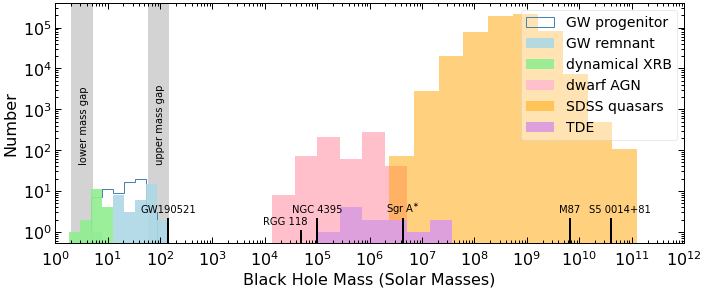

In [367]:
import matplotlib

# Figure inspired by https://arxiv.org/pdf/1610.05309.pdf


M_f = data_GW['final_mass_source']
M1 = data_GW['mass_1_source']
M2 = data_GW['mass_2_source']

# Exclude probable NS
M1 = M1[M1>3]
M2 = M2[M2>3]


fig,ax = plt.subplots(1, 1, figsize=(10, 4.25))
#ax2 = ax.twinx()


bins = np.logspace(-1, 3, 20)

ax.axvspan(2, 5, color='lightgray', zorder=-2) # Lower mass gap
ax.axvspan(60, 140, color='lightgray', zorder=-2) # Upper mass gap

ax.text(60 + (140-60)/2, 50, 'upper mass gap', ha='center', rotation=90)
ax.text(2 + (5-2)/2, 50, 'lower mass gap', ha='center', rotation=90)


ax.hist(np.concatenate([M1, M2]), bins=bins, color='steelblue', histtype='step', label='GW progenitor', zorder=-1)
ax.hist(M_f, bins=bins, color='lightblue', label='GW remnant', alpha=0.9)

ax.hist(data_XRB['M1_1'], bins=bins, color='lightgreen', label='dynamical XRB', alpha=0.9)


# SMBH


bins = np.logspace(2, 8, 15)
ax.hist(10**data_dwarf_AGN['mass'], bins=bins, color='pink', label='dwarf AGN')

bins = np.logspace(4, 13, 20)
ax.hist(10**data_sdss['LOGMBH'], bins=bins, color='orange', label='SDSS quasars', alpha=0.5)

bins = np.logspace(2, 8, 15)
ax.hist(10**logMBH_TDE, bins=bins, color='plum', label='TDE')

ax.text(142, 3, 'GW190521', ha='center')
ax.axvline(142, 0, .1, color='k')

ax.text(25000, 1.5, 'RGG 118', ha='center')
ax.axvline(50000, 0, .05, color='k')

ax.text(1e5, 3, 'NGC 4395', ha='center')
ax.axvline(1e5, 0, .1, color='k')

ax.text(4.3*1e6, 3, r'Sgr A$^{\ast}$', ha='center')
ax.axvline(4.3*1e6, 0, .1, color='k')

ax.text(6.5*1e9, 3, r'M87', ha='center')
ax.axvline(6.5*1e9, 0, .1, color='k')

ax.text(6e10, 3, r'S5 0014+81', ha='center')
ax.axvline(4e10, 0, .1, color='k')


#ax.text(1e0, 1e2, 'stellar-mass BH', fontsize=18)

#ax.text(1e3, 1e3, 'IMBH', fontsize=18)

#ax.text(1e8, 1e3, 'SMBH', fontsize=18)GW190521


# Lower mass gap

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 1e12)

ax.set_ylabel('Number')
ax.set_xlabel('Black Hole Mass (Solar Masses)')

ax.legend(loc=1, frameon=True, fontsize=14, framealpha=0.4)

# Axis
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=14) 
ax.xaxis.set_major_locator(locmaj)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=14)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.tick_params(axis='x', which='major', pad=7)

fig.tight_layout()
fig.savefig('bh_mass_det_spectrum.pdf', dpi=300)

In [270]:
data_XRB

Name,e,Ctp,SpType,Porb,e_Porb,2,K2,e_K2,f(M1),(M1),M1,M1_1,_M1,e_ M1u,_q,q,E_q,e_ qu,_i,i,e_ iu,ni,tsini,sini,sini_1,Ref
str18,str1,str10,str7,float64,float64,str1,float64,float64,float64,float64,str2,float64,float64,str5,str2,str5,float64,float64,str2,float64,float64,str2,str5,float64,float64,str81
SWIFT J1357.2-0933,+,--,M2-4V,2.8,0.3,--,967.0,49.0,11.0,2.1,>,8.9,--,--,~,0.04,--,--,~,90.0,--,--,--,--,--,Corral-Santana2013;MataSanchez2015
XTE J1650-500,--,--,~K4V,7.69,0.02,--,435.0,30.0,2.7,0.6,<=,7.3,--,--,--,---,--,--,>,47.0,--,--,--,--,--,Orosz2004
XTE J1118+480,--,--,K7-M1V,4.078414,5e-06,--,709.0,1.0,6.27,0.04,--,6.9,--,- 8.2,--,0.024,0.009,0.009,--,68.0,-79.0,--,96.,3.0,11.0,Khargharia2013;Torres2004;GonzalezHernandez2008;Calvelo2009
XTE J1859+226,--,V406 Vul,~K5V,6.58,0.05,--,541.0,70.0,4.5,0.6,>,5.42,--,--,--,---,--,--,<,70.0,--,--,--,--,--,Corral-Santana2011
SAX J1819.3-2525,--,V4641 Sgr,B9III,67.6152,0.0002,--,211.0,3.0,2.7,0.1,--,6.4,0.6,0.6,--,0.63,--,-0.7,--,72.0,4.0,--,100.9,0.8,0.8,Orosz2001;MacDonald2014
XTE J1550-564,--,--,K2-K4IV,37.0088,0.0001,--,363.0,6.0,7.65,0.38,--,7.81,--,-15.6,~~,0.03,--,--,--,75.0,4.0,--,55.,5.0,5.0,Orosz2002;Orosz2011b
GRO J1655-40,--,N. Sco 94,F6IV,62.92,0.003,--,226.1,0.8,2.73,0.09,--,6.0,0.4,0.4,--,0.42,0.03,0.03,--,69.0,2.0,--,86.,3.3,3.6,Orosz1997;VanDerHooft1998;Shahbaz1999;Shahbaz2003;Beer2002;GonzalezHernandez2008a
GRS 1009-45,--,N. Vel 93,K7-M0V,6.8449,0.0003,--,475.0,6.0,3.2,0.1,>~,4.4,--,--,--,0.14,0.02,0.02,--,37.0,-80.0,--,---,--,--,Filippenko1999;Shahbaz1996
GRS 1915+105,--,V1487 Aql,K1-5III,812.0,4.0,--,126.0,1.0,7.0,0.2,--,10.1,0.6,0.6,--,0.042,0.024,0.024,--,66.0,2.0,--,21.,4.0,4.0,Harlaftis2004;Steeghs2013;Fender1999
